In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df["class"] = df['class'].str.replace("Iris-","")

In [5]:
df = df.rename(columns={"class":"species"})

In [6]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## EDA

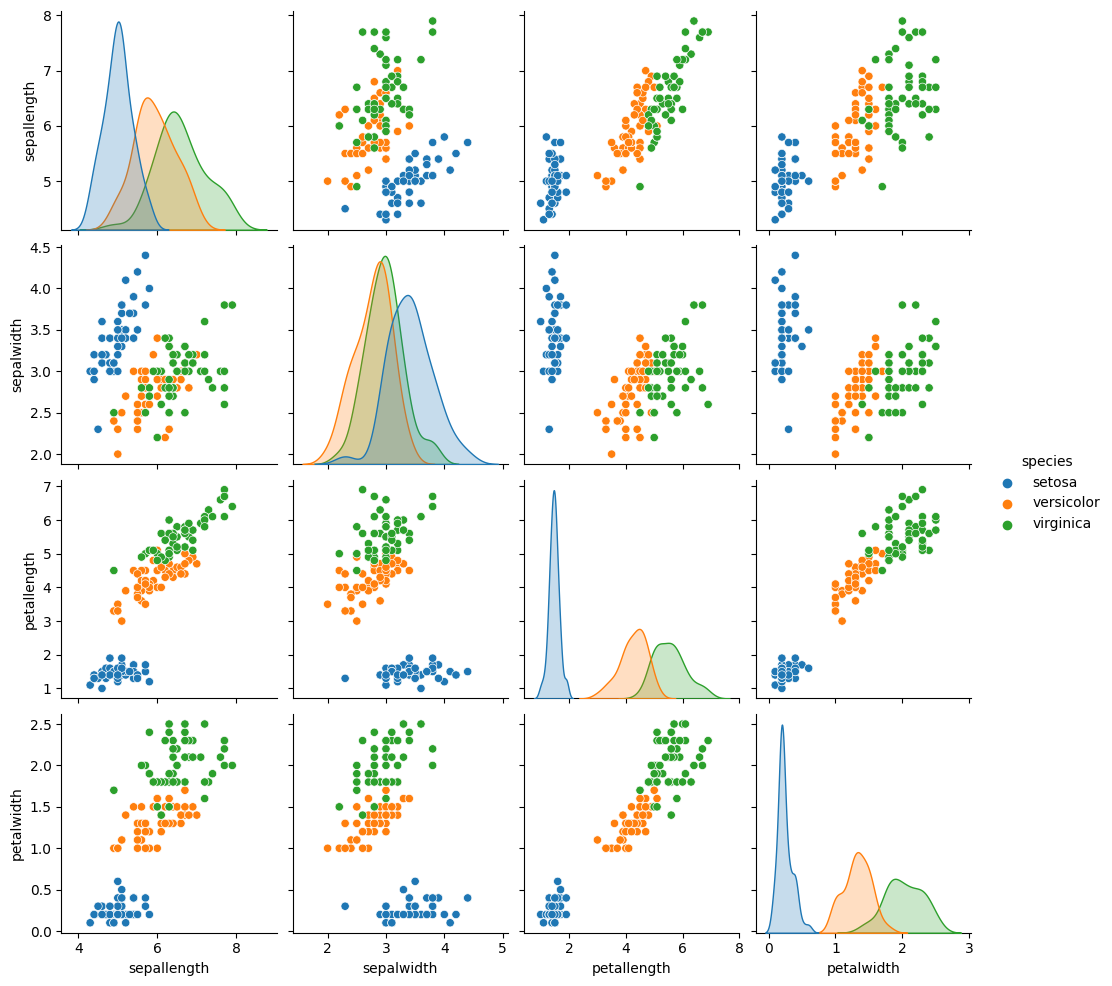

In [7]:
sns.pairplot(df,hue="species")

In [8]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df["species_num"] = df["species"]

In [10]:
df["species_num"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
df["species_num"]=df["species_num"].str.replace('setosa',"1")
df["species_num"]=df["species_num"].str.replace('versicolor',"2")
df["species_num"]=df["species_num"].str.replace('virginica',"3")

In [12]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,species,species_num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [13]:
df["species_num"]=pd.to_numeric(df["species_num"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   species      150 non-null    object 
 5   species_num  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<Axes: >

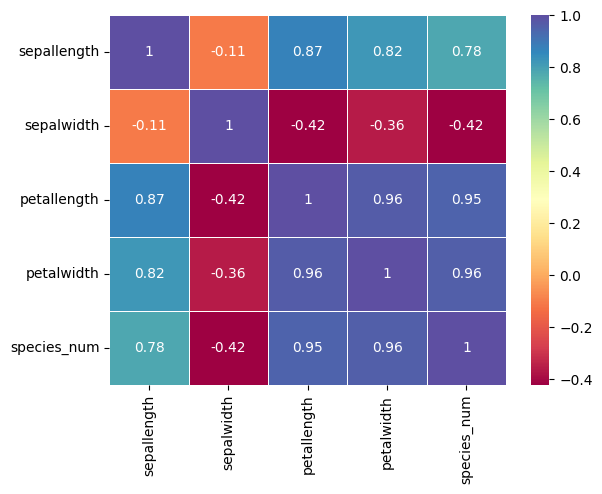

In [15]:
sns.heatmap(df.corr(numeric_only=True),annot=True,lw=0.5,cmap="Spectral")

In [16]:
df.drop(["petallength","species_num"],axis=1,inplace=True)

In [17]:
df.head()

,sepallength,sepalwidth,petalwidth,species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


## Model Building

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.iloc[:,:-1]

In [20]:
y=df.iloc[:,-1]

In [21]:
x

,sepallength,sepalwidth,petalwidth
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42)

In [23]:
rf_model = RandomForestClassifier()

In [24]:
rf_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [25]:
ypred = rf_model.predict(xtest)

In [26]:
print("Accuracy Score:",accuracy_score(ypred,ytest))

Accuracy Score: 0.9473684210526315


In [28]:
cv_score = cross_val_score(estimator=rf_model,X=xtrain,y=ytrain,cv=10)
cv_score.mean()

0.9098484848484848

In [32]:
features = list(df.columns)[:-1]

In [33]:
targets = list(df["species"].unique())

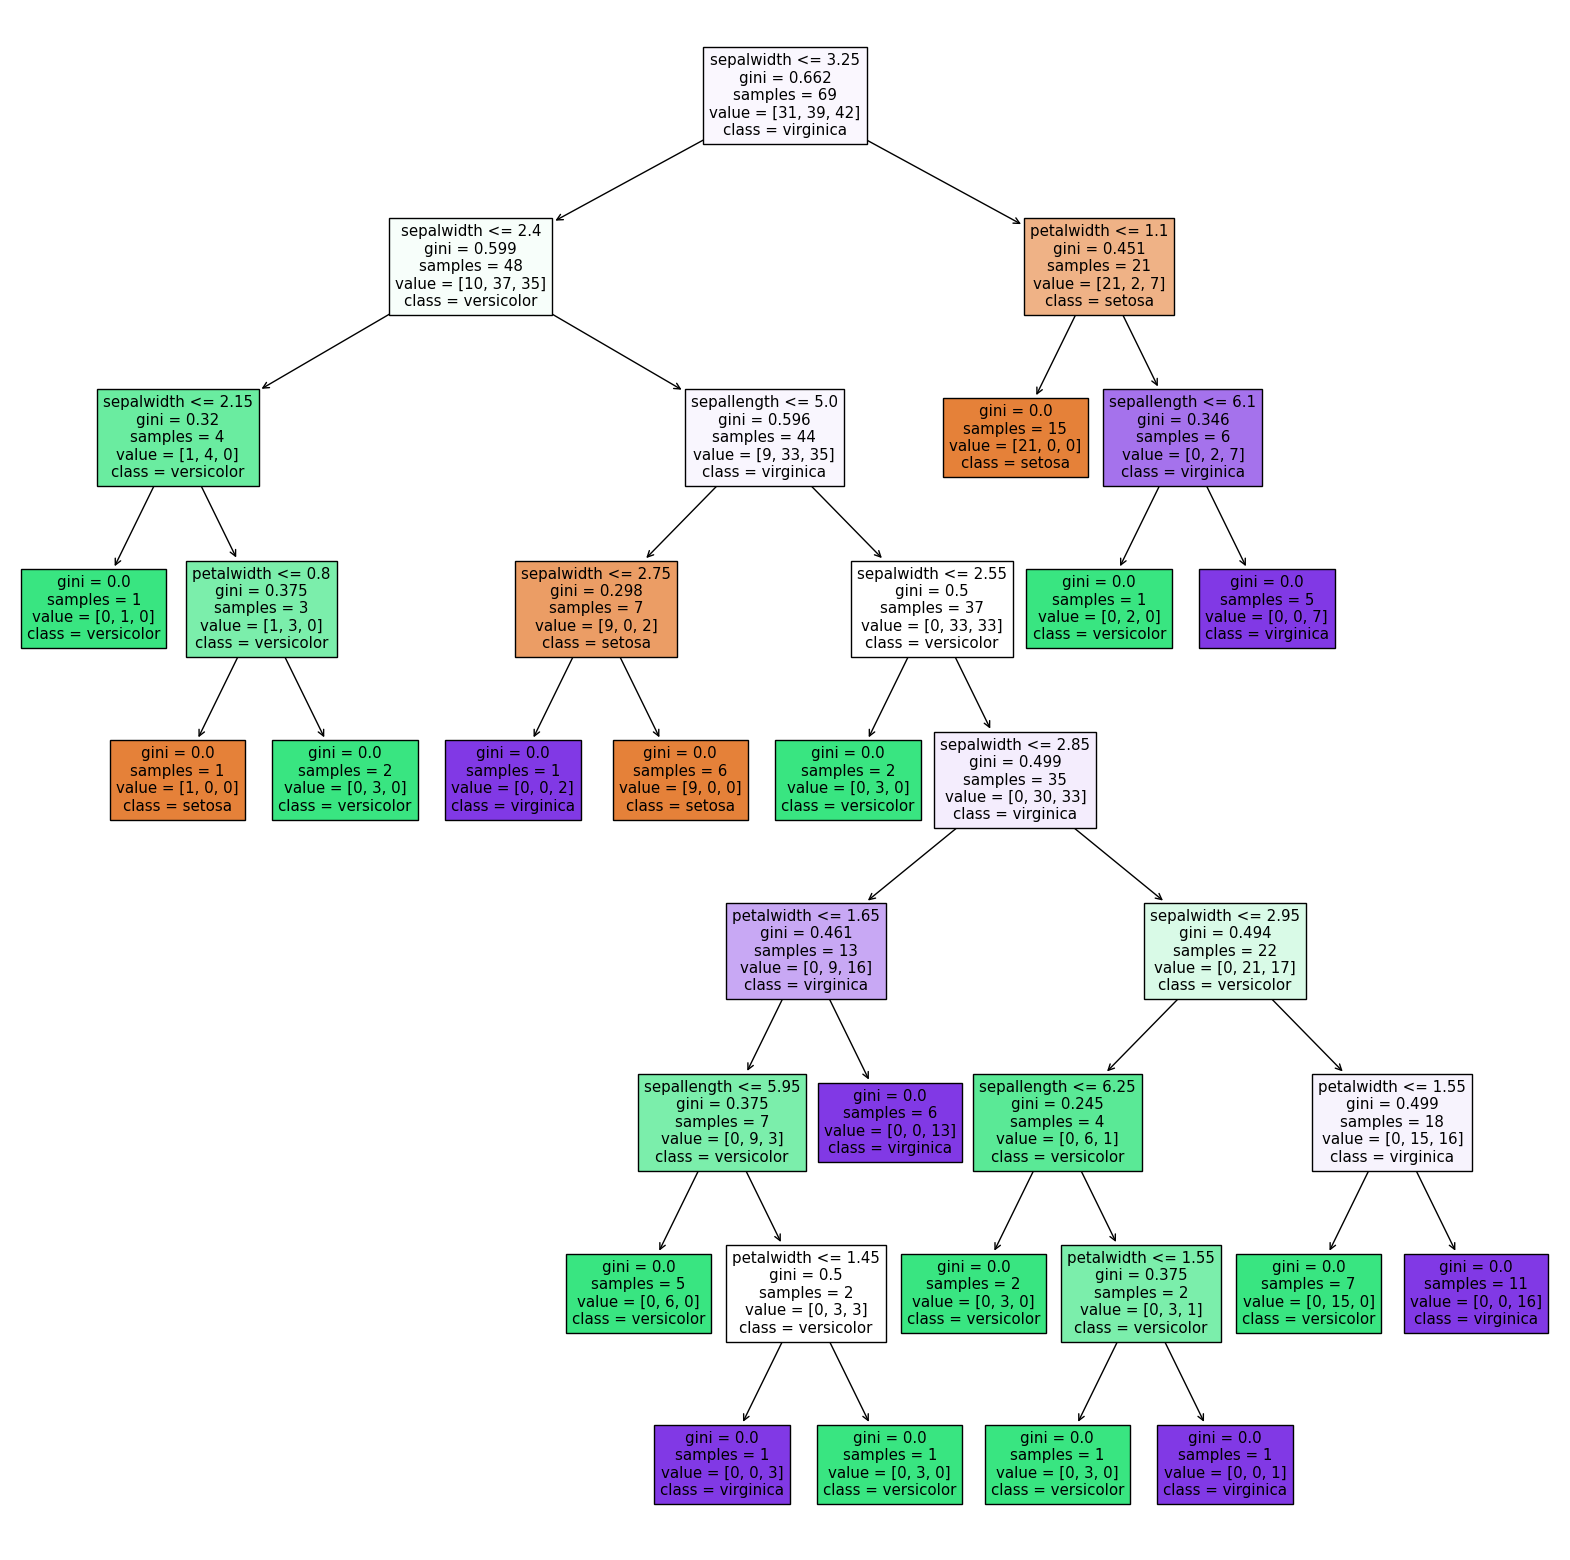

In [34]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(rf_model.estimators_[0],feature_names=features,class_names=targets,filled=True)

In [35]:
print(confusion_matrix(ypred,ytest))

[[15  0  0]
 [ 0  9  0]
 [ 0  2 12]]


Text(50.722222222222214, 0.5, 'Actual Species')

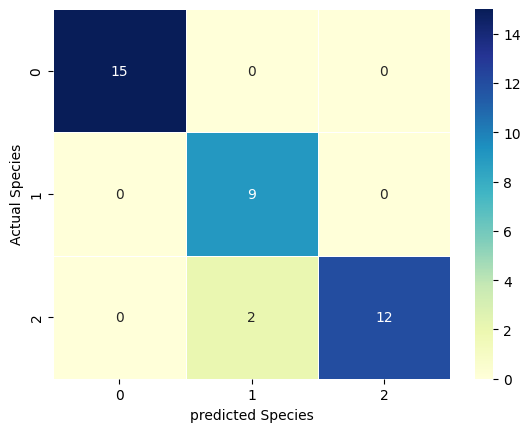

In [36]:
sns.heatmap(confusion_matrix(ypred,ytest),annot=True,lw=0.5,cmap="YlGnBu")
plt.xlabel("predicted Species")
plt.ylabel("Actual Species")

In [37]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.86      0.92        14

    accuracy                           0.95        38
   macro avg       0.94      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



## hyperparameter optimization

In [38]:
rf_model2 = RandomForestClassifier()

In [39]:
rf_params = {"n_estimators":[50,100,300],
            "max_depth":[3,5,7],
            "max_features":[2,4,6,8],
            "min_samples_split":[2,4,6]}

In [40]:
rf_cv_model = GridSearchCV(estimator = rf_model2, param_grid = rf_params,cv=5,n_jobs=-1)

In [41]:
rf_cv_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 300]})

In [42]:
rf_cv_model.best_params_

{'max_depth': 3, 'max_features': 6, 'min_samples_split': 4, 'n_estimators': 50}

In [43]:
rf_tuned = RandomForestClassifier(max_depth=3,max_features=2,min_samples_split=2,n_estimators=50)

In [44]:
rf_tuned.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=50)

In [45]:
ypred = rf_tuned.predict(xtest)

In [46]:
print("Accuracy Score:",accuracy_score(ypred,ytest))

Accuracy Score: 1.0


In [47]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [48]:
rf_tuned.feature_importances_

array([0.2116758 , 0.06889645, 0.71942775])

In [49]:
xtrain.columns

Index(['sepallength', 'sepalwidth', 'petalwidth'], dtype='object')

In [50]:
best_features = pd.DataFrame(rf_tuned.feature_importances_,xtrain.columns,columns=["Feature_value"])

<Axes: >

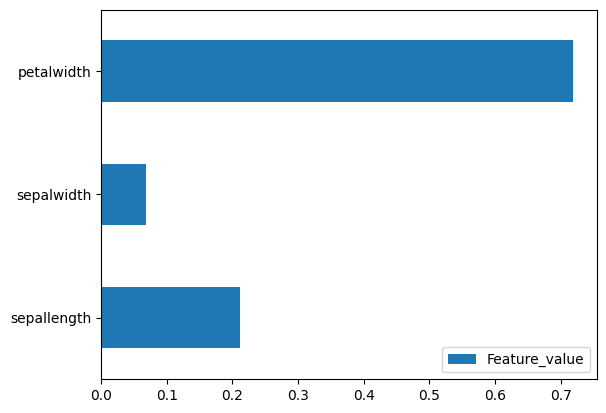

In [51]:
best_features.plot(kind="barh")

In [52]:
## 100 percent accuracy is achieved.